Skończyliśmy na dwóch gaussowskich peakach, których średnie również zbiegają do Gaussowskich peaków.

$$g(n) = \frac{1}{\sqrt{2 \pi}} \frac{e^{-x^2/2}}{x}$$
$$ x = \frac{\mu_1 - \mu_2}{\sqrt{\sigma_1^2 + \sigma_2 ^2}} \sqrt{n} $$

$q$ można oszacować **od góry** jako ogon rozkładu prawdopodobieństwa. Szacujemy z góry wsadzając w całkę z rozgładu od $x$ do $\inf$ czynnik $t/x > 1$ Dostajemy ostatecznie gaussowski rozkład.

> To jest państwu potrzebne w tym momencie... no nie za bardzo.

> Notabene w książce Goldberga, w której jest to wyprowadzenie, to ono jest zrobione źle.

W każdym razie, jest taki magiczny punkt gdzie zeruje się pochodna $\frac{\partial L(N, n)}{\partial n} = 0$.

Optymalny podział prób wymaga aby liczba prób z lepszym ramieniem rosła superwykładniczo - chociaż troszkę szybciej niż wykładniczo. *Odniesienie do populacji drapieżników w predator-prey w DUNach?*

> Liczba prób dobrym ramieniem, liczba schematu który będzie się pojawiał w al.gen. - liczba schematów prowadzących do dobrego rozwiązania też powinna rosnąć wykładniczo w populacji.

Lepszą analogią do Algenów jest
# **problem $k$-ramiennego bandyty**
Układ $k$ ramion. Optymalny podział prób wymaga żeby liczba prób z lepszym ramieniem rosła wykładniczo.

> To jeszcze nie jest to samo co al.gen. - tam rozpatrujemy wiele problemów k-ramiennego bandyty jednocześnie - zestaw **konkurujących schematów**.

Takie schematy, gdzie na każdej pozycji $i = 1, 2, 3... L$ ($L - $ długość chromosomu)
* albo $a_i = b_i = *$ (dowolny symbol)
* albo $a_i \neq b_i \neq *$ oraz $a_i \neq b_i$ co najmniej dla jednego $i$.

Przykład schematów konkurujących na pozycjach 2, 3, 5:
```
*00*0**
*00*1**
*01*0**
...
*11*1**
```

Prawidłowa strategia wymaga, żeby przydział miejsc dla najlepszych schematów rósł wykładniczo lub superwykładniczo.

> Osobom zainteresowanym proponuję przeczytanie rozdziału z książki Goldberga, ale nie jestem pewien czy on coś więcej wam w tej kwestii wytłumaczy.

# W jaki sposób algorytm genetyczny może sobie radzić albo nie radzić z pewnymi standardowymi problemami

> Testując algorytmy genetyczne tworzymy pewne **benchmarki** - mamy funkcję którą optymalizujemy. To daje lepsze lub gorsze rozwiązania.

> Chcemy zrozumieć problemy, na jakie może się natknąć nieskomplikowany algorytm genetyczny.

Można stworzyć w miarę proste zadanie z algorytmiki czy matematyki, funkcję mającą globalne optimum i zobaczyć czy AG w nie trafi, czy w jakieś lokalne.

Chcemy naruszyć "hipotezę cegiełek" - dobrze przystosowane schematy niskiego rzędu odgrywają kluczową rolę w działaniu AG.

Najprostszy przykład: problem dwubitowy. Mamy cztery schematy rzędu 2
```
***0***0* - $f_{00}$
***0***1* - $f_{01}$
***1***0* - $f_{10}$
***1***1* - $f_{11}$
```
$f$ - funkcja przystosowania, zakładamy globalne optimum na $f_{11}$ - to znaczy że $f_{11} > [f_{00}, f_{01}, f_{10}]$

Problem: element tzw. zwodniczości, np. jeden lub oba schematy rzędu 1 mające suboptymalnych reprezentatów są lepsze niż odpowiedni schemat rzędu 1 mające optymalnych reprezentatów. *Czyli widzimy coś paskudnego, w czym są schowane dobre geny, ale ciężko je rozpoznać*. Na przykład: Oba schematy 01 oraz 10 mają tutaj jedynki, co przybliża je do 11.

Matematycznie:

$f(0*) > f(1*)$ lub $f(*0) > f(*1)$

Globalne optimum - 11

Przykład:
> Kobiety lubią niebieskookich blondynów, ale bycie niebieskookim albo bycie blondynem nie wystarcza

Przyjmijmy $f(0*) = (f(01) + f(00))/2$. To jest głupie o tyle, że nie musi być ta sama liczba osobników. Ale załóżmy...

Z drugiego $f(00) > f(01) + f(11)$

Dodając z "lub" stronami i skracając wyrazy po obu stronach,

$f(00) > f(11)$

# Unormowanie
(wszystko jest do tej pory według Goldberga)

$r = f_{11}/f_{00}$, $c=f_{01}/f_{00}$, $c' = f_{10}/f_{00}$

Globalność: $ r > 1, c, c'$.

Zwodniczość: $r < 1 + c - c' = f_{11} < f_{00} + f_{01} - f_{10}$
Więc:
$$f_{11} + f_{10} < f_{00} + f_{01}$$ (równoważne tej pierwszej nierówności

$c-c' > 0$

$ r < (1-c') + c $

$1 - c' > 0$

$c' < 1$

$f_{01} > f_{10}$

$f_{10} < f_{00}$

$f_{10} < f_{01}, f_{00}$

1. $c > 1$ znaczy że $f_{01} > f_{00}$ - problem zwodniczy pierwszego rodzaju, łatwiejszy do rozwiązania. Ten kto ma trochę cech najlepszego jest trochę lepszy
2. $c < 1$ znaczy że $f_{01} < f_{00}$ - ten kto nie ma żadnych cech najlepszego nie jest najgorszy. Problem zwodniczy drugiego rodzaju.

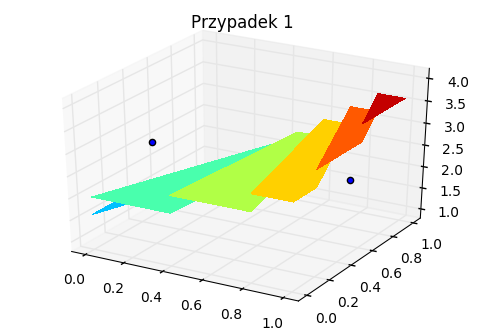

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Przypadek 1")

x = y = np.arange(2)
X, Y = np.meshgrid(x,y)
f = np.zeros((2,2))
f[0,0] = 2
f[1,0] = 1
f[0,1] = 3
f[1,1] = 4

# ax.plot_wireframe(X,Y,f)
ax.contourf(X,Y,f)
#srednia: f_{0*}
ax.scatter([0], [0.5], [(2+3)/2])
#srednia: f_{1*}
ax.grid()

ax.scatter([1], [0.5], [(4+1)/2])

In [ ]:
f[0,0] = 3
f[1,0] = 1
f[0,1] = 2
f[1,1] = 4

Są to w każdym razie płaszczyzny, nieliniowe, więc
$$f(x_1, x_2) \neq ax_1 + bx_2$$

a co najmniej

$$f(x_1, x_2) = ax_1 + bx_2 + cx_1x_2$$